#### Importing required modules

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

#### Defining a function which converts normal data points to reflected data points

In [2]:
def data_reflect(values,labels):
    for i in range(len(values)):
        if(labels[i]==2):
            values[i]*=-1
    return values

#### Defining a function to Convert the data to augmented Space

In [3]:
def convert_augmented(data):
    Aug_data=[]
    for i in range(len(data)):
        k=np.hstack((1,np.array(data[i])))
        Aug_data.append(k)
    return np.array(Aug_data)

#### Defining a function which performs Perceptron Learning

In [45]:
def Perceptron_train(data,eta,D,labels):
    Augm_data=convert_augmented(data)
    ref_data=data_reflect(Augm_data,labels)
    #Shuffling the data
    shuffled_indices=random.sample([i for i in range(len(data))],len(data))
    W=(np.ones(D+1)*0.1)
    epoch=0
    weight_list=[]
    cost_list=[]
    #Running for 10000 iterations
    while epoch<=10000:
        Cost_J=0
        for j in shuffled_indices:
            if(np.matmul(W,(ref_data[j]))<=0):
                W+=(eta*ref_data[j].T)
                Cost_J+=np.dot(W,ref_data[j])
        #If the cost is zero, all points are correctly classified
        if Cost_J==0:
           print("Data is Linearly seperable")
        #Appending weights and costs after 9500 iterations
        if epoch>=9500:
            weight_list.append(W.reshape(3,1))
            cost_list.append(Cost_J)
        if epoch==10000:
            weight_index=min(range(len(cost_list)),key=lambda k:abs(cost_list[k]))
            weight_final=weight_list[weight_index]
            Cost=cost_list[weight_index]
            print("Data is Not linearly seperable")
        epoch+=1
    return weight_final,-1*Cost

#### Function to classify data based on trained algorithm's weight vector

In [29]:
def classify_data(W,data):
    classified_labels=[]
    aug_data=convert_augmented(data)
    for i in range(len(data)):
        if(np.dot(W.T,aug_data[i].reshape(3,1)))>0:
            classified_labels.append(1)
        else:
            classified_labels.append(2)
    return classified_labels

#### Function to get error rate

In [30]:
def error_rate_calc(pred_labels, act_labels):
    er_count=0
    for i in range(len(pred_labels)):
        if(pred_labels[i]!=act_labels[i]):
            er_count+=1
    return er_count/len(pred_labels)*100

#### Modified function of plotDecBoundaries

In [31]:
def plot_Decision_boundaries(data, labels, weight):
    
    #Feature range defining for plotting
    max_x = np.ceil(max(data[:, 0])) + 1
    min_x = np.floor(min(data[:, 0])) - 1
 
    plot_x = np.arange(min_x, max_x, 0.01) 
    #Plotting the data
    plt.plot(data[labels == 1, 0],data[labels == 1, 1], 'rx')
    plt.plot(data[labels == 2, 0],data[labels == 2, 1], 'go')
    #Specifying legend
    l1 = plt.legend(('Class-1', 'Class-2'), loc=4)
    plt.plot(plot_x, (-1 * weight[1] * plot_x - weight[0]) / weight[2], c='b', label = "decision_boundary")
    plt.gca().add_artist(l1)
    plt.show()
    

#### For synthetic dataset 1

In [32]:
syn_1_train=(pd.read_csv("/Users/krishnakamaladidam/Downloads/python3/synthetic1_train.csv",header=None)).values
syn_1_train_values=syn_1_train[:,[0,1]]
syn_1_train_labels=syn_1_train[:,-1]

##### Running perceptron algorithm on Synthetic dataset 1

In [46]:
weight_final_train_syn1,cost_syn1=Perceptron_train(syn_1_train_values,1,2,syn_1_train_labels)
classified_labels_syn1_train=classify_data(weight_final_train_syn1,syn_1_train_values)

Data is Not linearly seperable


##### For training data

In [47]:
error_rate_train_syn1=error_rate_calc(classified_labels_syn1_train,syn_1_train_labels)
print("final weight for training set 1 is {0}".format(weight_final_train_syn1))
print("The error rate on training set for synthetic dataset 1 is {0}:".format(error_rate_train_syn1))
print("The cost after iterations is {0}:".format(cost_syn1))

final weight for training set 1 is [[ 37.1    ]
 [-64.38367]
 [ 60.63242]]
The error rate on training set for synthetic dataset 1 is 2.0:
The cost after iterations is -0.04582342124912486:


##### Plotting the decision region and boundary for training set for synthetic dataset 1

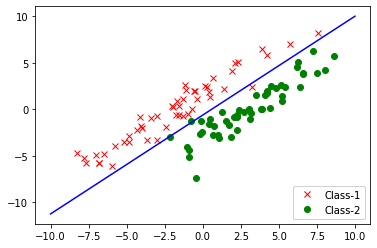

In [49]:
plot_Decision_boundaries(syn_1_train_values,syn_1_train_labels,weight_final_train_syn1)

##### For test set

In [50]:
syn_1_test=(pd.read_csv("/Users/krishnakamaladidam/Downloads/python3/synthetic1_test.csv",header=None)).values
syn_1_test_values=syn_1_test[:,[0,1]]
syn_1_test_labels=syn_1_test[:,-1]
classified_labels_syn1_test=classify_data(weight_final_train_syn1,syn_1_test_values)
error_rate_test_syn1=error_rate_calc(classified_labels_syn1_test,syn_1_test_labels)

print("The error rate on test set for synthetic dataset 1 is {0}:".format(error_rate_test_syn1))

The error rate on test set for synthetic dataset 1 is 1.0:


#### For synthetic dataset 2

In [51]:
syn_2_train=(pd.read_csv("/Users/krishnakamaladidam/Downloads/python3/synthetic2_train.csv",header=None)).values
syn_2_train_values=syn_2_train[:,[0,1]]
syn_2_train_labels=syn_2_train[:,-1]

In [52]:
weight_final_2,cost_syn2=Perceptron_train(syn_2_train_values,1,2,syn_2_train_labels)
classified_labels_2=classify_data(weight_final_2,syn_2_train_values)

Data is Not linearly seperable


In [63]:
error_rate_train_syn2=error_rate_calc(classified_labels_2,syn_2_train_labels)
print("final weight for training set 2 is {0}".format(weight_final_2))
print("The error rate on training set for synthetic dataset 2 is {0}:".format(error_rate_train_syn2))
print("The cost after iterations is {0}".format(cost_syn2))

final weight for training set 2 is [[ 2.1     ]
 [ 0.770615]
 [10.861888]]
The error rate on training set for synthetic dataset 2 is 1.0:
The cost after iterations is 0.6619908227717048


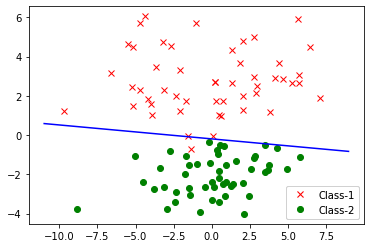

In [54]:
plot_Decision_boundaries(syn_2_train_values,syn_2_train_labels,weight_final_2)

##### For test set

In [55]:
syn_2_test=(pd.read_csv("/Users/krishnakamaladidam/Downloads/python3/synthetic2_test.csv",header=None)).values
syn_2_test_values=syn_2_test[:,[0,1]]
syn_2_test_labels=syn_2_test[:,-1]
classified_labels_syn2_test=classify_data(weight_final_2,syn_2_test_values)
error_rate_test_syn2=error_rate_calc(classified_labels_syn2_test,syn_2_test_labels)

print("The error rate on test set for synthetic dataset 2 is {0}:".format(error_rate_test_syn2))

The error rate on test set for synthetic dataset 2 is 8.0:


#### For wine dataset

In [56]:
wine_train=(pd.read_csv("/Users/krishnakamaladidam/Downloads/python3/wine_train.csv",header=None)).values
wine_train=wine_train[wine_train[:,-1]<3]
wine_train_values=wine_train[:,[0,1]]
wine_train_labels=wine_train[:,-1]


In [65]:
weight_final_wine_train,cost_wine_train=Perceptron_train(wine_train_values,1,2,wine_train_labels)
classified_labels_wine=classify_data(weight_final_wine_train,wine_train_values)
error_rate_train_wine=error_rate_calc(classified_labels_wine,wine_train_labels)
print("final weight for training set for wine set is {0}".format(weight_final_wine_train))
print("The error rate on training set for synthetic dataset 2 is {0} :".format(error_rate_train_wine))
print("The cost after iterations is {0}:".format(cost_wine_train))

Data is Not linearly seperable
final weight for training set for wine set is [[-504.9 ]
 [  38.92]
 [   1.1 ]]
The error rate on training set for synthetic dataset 2 is 6.153846153846154 :
The cost after iterations is -533.190000000006:


#### For wine test set

In [66]:
wine_test=(pd.read_csv("/Users/krishnakamaladidam/Downloads/python3/wine_test.csv",header=None)).values
wine_test=wine_test[wine_test[:,-1]<3]
wine_test_values=wine_test[:,[0,1]]
wine_test_labels=wine_test[:,-1]


In [67]:
classified_labels_wine_test=classify_data(weight_final_wine_train,wine_test_values)
error_rate_test_wine=error_rate_calc(classified_labels_wine_test,wine_test_labels)

print("The error rate on test set for Wine dataset is {0}:".format(error_rate_test_wine))

The error rate on test set for Wine dataset is 9.230769230769232:
